## Clean up the Data

Questions:
1. Which month has the highest profit? What about the lowest? What are the profits of each month? How can we find ways to increase earnings? Give your reasoning.  
2. How much gross earnings did the store make in 2020?
3. Which flavour is the most popular in the overall store?
4. What is the most popular item in the store? Give an explanation to why.
5. What are the two most popular combinations in the store? 
6. It seems like we forgot to add a column called “Actual Cost.” This is how much it costs to make a product. Let’s assume it’s around 30% per product.
7. Find the profits of the store.

## 1. Which month has the highest profit? What about the lowest? What are the profits of each month? 

### Right now, our sales data is seperate into 12 csv (to represent the 12 months). So let's first combine it. 

In [1]:
import pandas as pd
import glob

In [2]:
# get all files in the following folder 
files = [file for file in glob.glob('./sales_data/*.csv')]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, index_col=None, header=0)
    all_months_data = pd.concat([all_months_data, df]) 

all_months_data.to_csv("2020_bakery_sales.csv", index=False)

In [3]:
all_data = pd.read_csv("2020_bakery_sales.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date
0,19923,Dalgona Coffee (Original - Hot),4,2.75,02/18/20 12:14
1,19924,Macaroon (Earl Grey),1,3.00,02/10/20 12:27
2,19924,Tea (Earl Grey),1,1.75,02/10/20 12:27
3,19925,Macaroon (Chocolate),4,2.75,02/28/20 12:32
4,19926,Macaroon (Vanilla),3,2.75,02/16/20 12:21


### Now, we have to get the month. Notice that for the order date, there's a pattern. In this dataset, the month is always at the start. If we had the day in date column, we may have to figure out another pattern or solution. But for now, let's assume that the format of the date doesn't change with this dataset (i.e it's static). 

In [4]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype("int32") 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month
0,19923,Dalgona Coffee (Original - Hot),4,2.75,02/18/20 12:14,2
1,19924,Macaroon (Earl Grey),1,3.00,02/10/20 12:27,2
2,19924,Tea (Earl Grey),1,1.75,02/10/20 12:27,2
3,19925,Macaroon (Chocolate),4,2.75,02/28/20 12:32,2
4,19926,Macaroon (Vanilla),3,2.75,02/16/20 12:21,2


### Okay, so now we need to get the sales. Let's find the total sale of each time.

In [5]:
TAX = 1.13

all_data['Sales (CAD)'] = round(all_data['Quantity Ordered'] * all_data['Price Each'], 2)
all_data.head()

result = all_data.groupby('Month').sum()
print(result)

         Order ID  Quantity Ordered  Price Each  Sales (CAD)
Month                                                       
1       154039830             14462    46957.50     61411.75
2       202756315             12369    40749.00     52993.00
3       427431871             18646    60981.00     79575.00
4       299413434             10106    33818.00     43751.50
5      1096767012             29093    95750.50    124913.00
6       794218569             16578    55520.25     71713.00
7      2238265211             37819   124114.50    161609.25
8      1943768485             26588    88067.50    114650.25
9      2472372061             29003    96889.00    125690.75
10     1965511059             20513    68230.50     88687.75
11     2665737503             25491    83521.25    109038.25
12     3377041231             28779    95040.25    123893.75


In [6]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# https://www.pythonforbeginners.com/basics/list-comprehensions-in-python

maxMonthValue = result['Sales (CAD)'].idxmax()
minMonthValue = result['Sales (CAD)'].idxmin()

def findMonthName(monthValue):
    for i in range(len(months) - 1):
        if i + 1 == monthValue:
            monthValue = months[i]
    return monthValue

maxMonthName = findMonthName(maxMonthValue)
minMonthName = findMonthName(minMonthValue)
maxMonthGrossEarnings = round(result.loc[maxMonthValue, 'Sales (CAD)'], 3)
minMonthGrossEarnings = round(result.loc[minMonthValue, 'Sales (CAD)'], 3)

print("Month with Highest Sales: " + str(maxMonthName) + " with profit of $" + str(maxMonthGrossEarnings) + "(CAD)")
print("Month with Lowest Sales: " + str(minMonthName) + " with profit of $" + str(minMonthGrossEarnings) + "(CAD)")

Month with Highest Sales: July with profit of $161609.25(CAD)
Month with Lowest Sales: April with profit of $43751.5(CAD)


### Let's verify with a graph

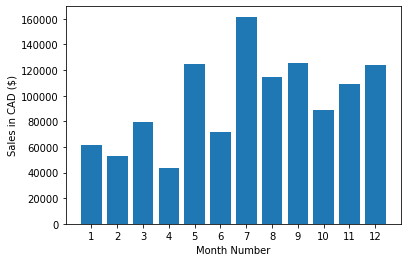

In [7]:
import matplotlib.pyplot as plt

months = range(1, 13)

# Make a bar chart with 
# months - x value, sum - y values (we just want Sales to be our y-axis)
plt.bar(months, result['Sales (CAD)']) 

# Source: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.xticks.html
# make ticks on the months 
plt.xticks(months)

# label 
plt.ylabel('Sales in CAD ($)')
plt.xlabel('Month Number')
plt.show()

### Here, we can easily see that month of July (7) had the highest sales while the month of April (4) had the lowest sales just at a glance.

### The month of April was when lockdown was strongly enforced in Ottawa so it's possible that people too scared to go outside for safety reasons. Maybe we can research other similiar services and and see how they did to find reasons to why this happened. In May, we launched an online store and offered free local delievery for over 25 dollars and promoted very heavily in our social media. Maybe we'll do this for April of next year and make sure people know!  

## How much gross earnings did the store make in 2020?

In [8]:
grossEarnings = round(result['Sales (CAD)'].sum(), 3)
print("Therefore, the gross earnings for the bakery section of the store is $" + str(grossEarnings) + "(CAD)")

Therefore, the gross earnings for the bakery section of the store is $1157927.25(CAD)


## Which flavour is the most popular in the overall store?

### Again, let's try to break down. If we look at the name of the product, we often find the flavours in most of the cases. There's a few exceptions such as "coffee (hot)" and "portuguese egg tarts." How do we categorize this?! Are these even flavours? What is defined as a flavour in our case? Some of the flavours are also unique to the store so we can't just look for a database. Okay, another problem: the flavours don't really have a pattern in text. Some are in brackets while others are incorporated in the name. We don't want to make this overly complex. I think for our solution, we can create our array containing flavours. We can check if the string is in one of the flavours. If we're not sure, let's put it as "misc."

In [9]:
flavours = ['original', 'strawberry', 'chocolate', 'matcha', 'rose', 'sakura', 'caramel', 'earl grey', 'green tea', 'lavender', 'peach', 'red bean', 'ube', 'vanilla', 'black seasame', 'mango', 'pandan Coconut', 'pistachio', 'curtard']
flavours = [flavour.lower() for flavour in flavours]

## For each row, go through the product column. Check if any element from flavours is in the substring. 

def checkFlavour(row):
    for i in flavours:
        if i in row:
            return i.title()
        elif "portguese tart egg" in row:
            return "Custard"

In [10]:
all_data['Flavour'] = all_data.apply(lambda row: checkFlavour(row['Product'].lower()), axis=1)

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales (CAD),Flavour
0,19923,Dalgona Coffee (Original - Hot),4,2.75,02/18/20 12:14,2,11.00,Original
1,19924,Macaroon (Earl Grey),1,3.00,02/10/20 12:27,2,3.00,Earl Grey
2,19924,Tea (Earl Grey),1,1.75,02/10/20 12:27,2,1.75,Earl Grey
3,19925,Macaroon (Chocolate),4,2.75,02/28/20 12:32,2,11.00,Chocolate
4,19926,Macaroon (Vanilla),3,2.75,02/16/20 12:21,2,8.25,Vanilla


In [12]:
# source: https://erikrood.com/Python_References/count_frequency_value_occurs_dataframe_final.html

flavours_result = all_data.groupby('Flavour').size()

# note to self: check docs to see what you can do with 'series' objects (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html)
flavours_result.sort_values(ascending=False)

Flavour
Matcha            28404
Original          24893
Green Tea         13730
Strawberry        13085
Chocolate         12999
Mango              6782
Ube                6204
Sakura             5523
Rose               5381
Red Bean           4788
Lavender           4745
Pistachio          3974
Earl Grey          3907
Custard            3807
Caramel            3074
Peach              2821
Pandan Coconut     2159
Black Seasame      2063
Vanilla            1860
dtype: int64

In [13]:
print("Therefore, the most popular flavour is", flavours_result.idxmax())

## https://www.ft.com/content/8e873238-2719-11e8-b27e-cc62a39d57a0

Therefore, the most popular flavour is Matcha


## What is the most popular item in the store? Give an explanation to why.

### Let's define the "most popular item" as the one that gets sold the once. We can do this by grouping based on 'Product Name' and finding the size()

In [14]:
number_products_sold = all_data.groupby('Product').size()
number_products_sold.idxmax()

'Dalgona Coffee (Original - Cold)'

#### Dalgona Coffee has been trending everywhere from Facebook in popular groups such as "Subtle Asian Group"

## What are the two most popular combinations in the store? 

#### Items are brought together if they are in the same order. So let's just look for columns with the same order number. 

In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales (CAD),Flavour
0,19923,Dalgona Coffee (Original - Hot),4,2.75,02/18/20 12:14,2,11.00,Original
1,19924,Macaroon (Earl Grey),1,3.00,02/10/20 12:27,2,3.00,Earl Grey
2,19924,Tea (Earl Grey),1,1.75,02/10/20 12:27,2,1.75,Earl Grey
3,19925,Macaroon (Chocolate),4,2.75,02/28/20 12:32,2,11.00,Chocolate
4,19926,Macaroon (Vanilla),3,2.75,02/16/20 12:21,2,8.25,Vanilla


In [16]:
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

multiOrderDF = all_data[all_data['Order ID'].duplicated(keep=False)]

In [17]:
multiOrderDF

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales (CAD),Flavour
1,19924,Macaroon (Earl Grey),1,3.00,02/10/20 12:27,2,3.00,Earl Grey
2,19924,Tea (Earl Grey),1,1.75,02/10/20 12:27,2,1.75,Earl Grey
7,19929,Japanese Rolled Cake (Slice - Strawberry Cream),1,4.00,02/16/20 12:36,2,4.00,Strawberry
8,19929,Green Tea Yakult Refresher,1,5.00,02/16/20 12:36,2,5.00,Green Tea
13,19934,Red Bean Bun,1,2.75,02/25/20 06:29,2,2.75,Red Bean
...,...,...,...,...,...,...,...,...
186350,131923,Dalgona Coffee (Chocolate - Cold),1,3.25,09/08/20 12:45,9,3.25,Chocolate
186366,131939,Japanese Rolled Cake (Slice - Matcha),1,4.00,09/02/20 13:01,9,4.00,Matcha
186367,131939,Green Tea Yakult Refresher,1,5.00,09/02/20 13:01,9,5.00,Green Tea
186371,131943,Japanese Rolled Cake (Slice - Matcha),1,4.00,09/18/20 10:20,9,4.00,Matcha


In [18]:
# source: https://pbpython.com/pandas_transform.html

multiOrderDF['Combination'] = multiOrderDF.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
multiOrderDF

/Users/monicavu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales (CAD),Flavour,Combination
1,19924,Macaroon (Earl Grey),1,3.00,02/10/20 12:27,2,3.00,Earl Grey,"Macaroon (Earl Grey),Tea (Earl Grey)"
2,19924,Tea (Earl Grey),1,1.75,02/10/20 12:27,2,1.75,Earl Grey,"Macaroon (Earl Grey),Tea (Earl Grey)"
7,19929,Japanese Rolled Cake (Slice - Strawberry Cream),1,4.00,02/16/20 12:36,2,4.00,Strawberry,Japanese Rolled Cake (Slice - Strawberry Cream...
8,19929,Green Tea Yakult Refresher,1,5.00,02/16/20 12:36,2,5.00,Green Tea,Japanese Rolled Cake (Slice - Strawberry Cream...
13,19934,Red Bean Bun,1,2.75,02/25/20 06:29,2,2.75,Red Bean,"Red Bean Bun,Dalgona Coffee (Strawberry - Cold)"
...,...,...,...,...,...,...,...,...,...
186350,131923,Dalgona Coffee (Chocolate - Cold),1,3.25,09/08/20 12:45,9,3.25,Chocolate,"Japanese Cheesecake (Slice - Matcha),Dalgona C..."
186366,131939,Japanese Rolled Cake (Slice - Matcha),1,4.00,09/02/20 13:01,9,4.00,Matcha,"Japanese Rolled Cake (Slice - Matcha),Green Te..."
186367,131939,Green Tea Yakult Refresher,1,5.00,09/02/20 13:01,9,5.00,Green Tea,"Japanese Rolled Cake (Slice - Matcha),Green Te..."
186371,131943,Japanese Rolled Cake (Slice - Matcha),1,4.00,09/18/20 10:20,9,4.00,Matcha,"Japanese Rolled Cake (Slice - Matcha),Peach Ya..."


In [19]:
# So we were able to make a new column but we can see that there's duplicates so let's drop them

multiOrderDF = multiOrderDF[['Order ID', 'Combination']].drop_duplicates()
multiOrderDF

,Order ID,Combination
1,19924,"Macaroon (Earl Grey),Tea (Earl Grey)"
7,19929,Japanese Rolled Cake (Slice - Strawberry Cream...
13,19934,"Red Bean Bun,Dalgona Coffee (Strawberry - Cold)"
25,19945,"Japanese Cheesecake (Slice - Matcha),Dalgona C..."
34,19953,"Japanese Cheesecake (Slice - Original),Tea (Gr..."
...,...,...
186335,131911,"Macaroon (Pistachio),Dalgona Coffee (Matcha - ..."
186345,131920,"Green Tea Bun,Peach Yakult Refresher"
186349,131923,"Japanese Cheesecake (Slice - Matcha),Dalgona C..."
186366,131939,"Japanese Rolled Cake (Slice - Matcha),Green Te..."


In [20]:
# Source: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
# https://pymotw.com/2/collections/counter.html

from itertools import combinations
from collections import Counter 

count = Counter()

for row in multiOrderDF['Combination']: 
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2))) 
    
# Display 10 most common in a simple list. see: https://pymotw.com/2/collections/counter.html
count.most_common(10)

for key, value in count.most_common(10):
    print(key, value)

('Macaroon (Pistachio)', 'Latte (Rose)') 67
('Donut (Matcha)', 'Dalgona Coffee (Strawberry - Hot)') 64
('Macaroon (Pistachio)', 'Dalgona Coffee (Strawberry - Hot)') 63
('Donut (Matcha)', 'Latte (Caramel)') 61
('Macaroon (Pistachio)', 'Tea (Lavender)') 61
('Donut (Matcha)', 'Coffee (Hot)') 60
('Donut (Matcha)', 'Dalgona Coffee (Matcha - Hot)') 59
('Donut (Matcha)', 'Americano (Iced)') 59
('Macaroon (Pistachio)', 'Latte (Regular)') 58
('Macaroon (Pistachio)', 'Dalgona Coffee (Strawberry - Cold)') 58


### Therefore, the most popular combinations are Macaroon (Pistachio) and Latte (Rose). 

## It seems like we forgot to add a column called “Actual Cost.” This is how much it costs to make a product and factors potential waste. Let’s assume it’s around 15% per product.

In [21]:
COST_PERCENTAGE = 0.15

all_data['Actual Cost (CAD)'] = round(all_data['Price Each'] * COST_PERCENTAGE, 2)

# How to drop a column: https://stackoverflow.com/questions/38288372/unable-to-drop-a-column-from-pandas-dataframe
# all_data.drop('Actual Cost', axis=1, inplace=True)

In [22]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales (CAD),Flavour,Actual Cost (CAD)
0,19923,Dalgona Coffee (Original - Hot),4,2.75,02/18/20 12:14,2,11.00,Original,0.41
1,19924,Macaroon (Earl Grey),1,3.00,02/10/20 12:27,2,3.00,Earl Grey,0.45
2,19924,Tea (Earl Grey),1,1.75,02/10/20 12:27,2,1.75,Earl Grey,0.26
3,19925,Macaroon (Chocolate),4,2.75,02/28/20 12:32,2,11.00,Chocolate,0.41
4,19926,Macaroon (Vanilla),3,2.75,02/16/20 12:21,2,8.25,Vanilla,0.41
...,...,...,...,...,...,...,...,...,...
186373,131944,Americano (Hot),1,3.50,09/07/20 06:11,9,3.50,None,0.52
186374,131945,Japanese Rolled Cake (Roll - Strawberry Cream),1,12.00,09/16/20 11:43,9,12.00,Strawberry,1.80
186375,131946,Coffee (Hot),1,2.25,09/22/20 13:45,9,2.25,None,0.34
186376,131947,Macaroon (Black Seasame),1,3.00,09/08/20 07:01,9,3.00,Black Seasame,0.45


## Find the gross profit of the store.

#### I'm not sure what gross profit is, so I'm going to look it up! (https://www.patriotsoftware.com/blog/accounting/how-do-you-determine-a-profit-margin/). It seems like it's revenue (how much money your product makes) - the cost of your goods.

In [29]:
# Let's find the total cost of the price 
revenue = round(all_data['Quantity Ordered'] * all_data['Price Each'], 2) 
cost = round(all_data['Actual Cost (CAD)'] * all_data['Actual Cost (CAD)'], 2) 
profit = revenue.sum() - cost.sum()
print("Therefore the store's profit for the year 2020 is: $", round(profit, 2))

Therefore the store's profit for the year 2020 is: $ 1014238.15
